This [dataset](https://snap.stanford.edu/data/com-Amazon.html) is the Amazon product co-purchasing network, built from the “Customers Who Bought This Item Also Bought” feature on Amazon. It contains 334,863 nodes (products) and 925,872 edges (co-purchase links), with all nodes belonging to one large connected component. The graph has an average clustering coefficient of 0.3967, around 667,000 triangles, and a diameter of 44, meaning the longest shortest path between two products is 44 steps. Overall, the network is large, highly connected, and shows significant local clustering, reflecting how products are grouped through frequent co-purchasing.

In [2]:
import gzip
import networkx as nx
import statistics
import matplotlib.pyplot as plt

This code loads a compressed Amazon co-purchase network file and extracts up to 15,000 edges for analysis. It builds a graph using NetworkX and ensures that only valid node pairs are added as edges. Since large networks can have many disconnected pieces, the code isolates the largest connected component to focus analysis on the biggest cluster of related nodes. This cleaned graph is then ready for computing metrics like diameter, clustering, and degree statistics.

In [18]:

# location where file is saved 
path = "C:/Users/Warner_Beast/OneDrive/Documents/CUNY/DATA 620 Web Analytics/Homeworks/Week 3/com-amazon.all.dedup.cmty.txt.gz"
EDGE_LIMIT = 15000 # cap edges for speed 

edges = []
# open the gz file  and handle the compression of the fly using the righ encoding
with gzip.open(path, mode='rt', encoding="utf-8", errors="ignore") as f:
    for line in f:
        # Skip empty lines or lines starting with '#' (comments/metadata).
        if not line or line.startswith("#"):
            continue
        # Split the line into parts (node identifiers).
        # Each valid line is expected to contain at least two numbers (u v).
        parts = line.strip().split()
        if len(parts) < 2 :
            continue
        u, v = parts[0], parts[1]
        edges.append((u, v))
        if len(edges) >= EDGE_LIMIT:
            break

G_full = nx.Graph()
G_full.add_edges_from(edges)


if G_full.number_of_nodes() > 0:
    #Find the largest connected component (LCC) of the graph.
    # nx.connected_components returns a list of sets of nodes; we pick the biggest one.
    lcc_nodes = max(nx.connected_components(G_full), key=len)
    G = G_full.subgraph(lcc_nodes).copy()
else:
    G = G_full.copy()

In [22]:
# Basic metrics 
n = G.number_of_nodes()
m = G.number_of_edges()


# Degree statistics 
degrees = [d for _, d in G.degree()]
avg_deg = sum(degrees)/len(degrees) if degrees else 0
med_deg = statistics.median(degrees) if degrees else 0
min_deg = min(degrees) if degrees else 0 
max_deg = max(degrees) if degrees else 0

In [23]:
from networkx.algorithms import approximation as approx
avg_clustering = nx.average_clustering(G)
if n <= 10000:
    diameter = nx.diameter(G)
    diam_method = 'exact'
else:
    diameter = approx.diameter(G)
    diam_method = "approximation"


This basic graph analysis shows that the largest connected component (LCC) of the Amazon co-purchase network sample contains 56 nodes connected by 65 edges. The degree statistics indicate that most nodes are sparsely connected, with a minimum degree of 1, a median of 1, and an average of about 2.32 connections per node, while the most connected node has only 12 links. The average clustering coefficient of 0.11177 suggests limited local grouping, meaning relatively few triangles form among connected nodes. Finally, the graph’s diameter is 10, which means the longest shortest path between any two nodes in this component spans ten steps, reflecting a modest level of connectivity within the network.


In [24]:
# ---- 3. Display results ----
print("=== Basic Graph Analysis ===")
print(f"Nodes (LCC): {n}")
print(f"Edges (LCC): {m}")
print(f"Degree min/median/avg/max: {min_deg} / {med_deg} / {avg_deg:.3f} / {max_deg}")
print(f"Average clustering coefficient: {avg_clustering:.5f}")
print(f"Diameter: {diameter}  (method: {diam_method})")

=== Basic Graph Analysis ===
Nodes (LCC): 56
Edges (LCC): 65
Degree min/median/avg/max: 1 / 1.0 / 2.321 / 12
Average clustering coefficient: 0.11177
Diameter: 10  (method: exact)


In [26]:
top_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)[:50]
H = G.subgraph([n for n, _ in top_nodes])


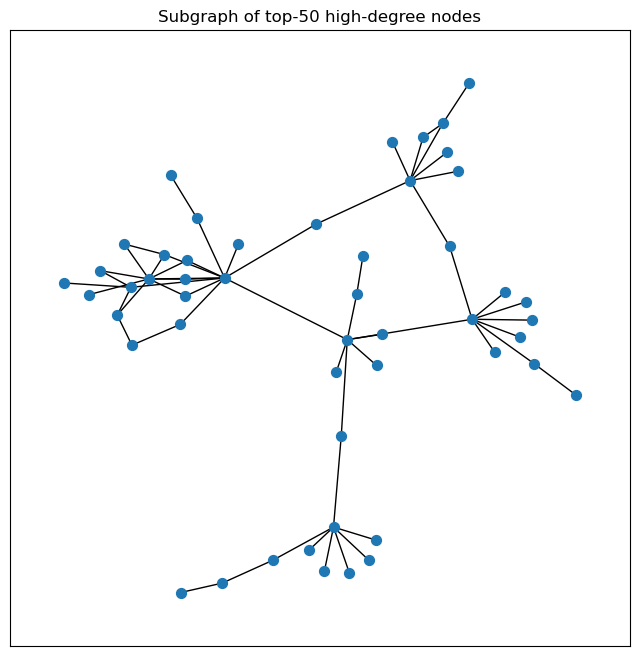

In [27]:
plt.figure(figsize=(8, 8))
pos = nx.spring_layout(H, seed=42)
nx.draw_networkx(H, pos, node_size=50, with_labels=False)
plt.title("Subgraph of top-50 high-degree nodes")
plt.show()

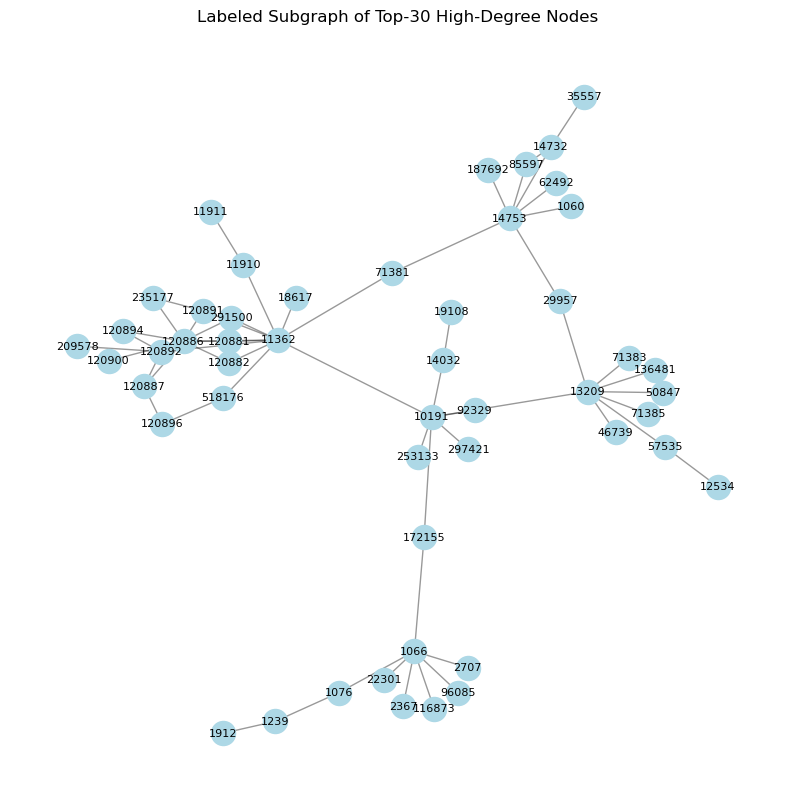

In [28]:
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(H, seed=42)
nx.draw_networkx_nodes(H, pos, node_size=300, node_color="lightblue")
nx.draw_networkx_edges(H, pos, alpha=0.4)
nx.draw_networkx_labels(H, pos, font_size=8, font_color="black")

plt.title("Labeled Subgraph of Top-30 High-Degree Nodes")
plt.axis("off")
plt.show()

In [29]:
# Save to GEXF for Gephi
nx.write_gexf(G, "amazon_subgraph.gexf")
nx.write_graphml(G, "amazon_subgraph.graphml")

The Youtube Video for this assignment can be found [Here](https://www.youtube.com/watch?v=DlGBcwgwnJ0)
and [GitHub]()